<a href="https://colab.research.google.com/github/hbeck118/GIS/blob/main/ps1_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set up

In [1]:
!pip install geopandas==1.0.1

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [3]:
#!python --version

In [4]:
!pip install mapclassify
import mapclassify #need for thematic map classification

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.4 MB/s eta 0:00:00


Shapefile of NJ Counties and NJ Transit

In [5]:
#Map of all NJ transit lines, found here: https://catalog.dvrpc.org/dataset/nj-transit-transit-routes
#Using AOK's code to produce a map of NJ Transit lines
! wget -q -O nj-transit.zip https://docs.google.com/uc?id=175h0d2RdsZQKC0NCTSuWZ5Su_vHiiHMh&export=download

zip_ref = zipfile.ZipFile('nj-transit.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njT0=gpd.read_file('NJ_Transit_Transit_Routes.shp') #load the shapefile with gpd as njC

In [6]:
#Trying to combine this map with a map of New Jersey provided in the example from the class
! wget -q -O nj_counties.zip https://docs.google.com/uc?id=1yCnSMGpZsNSjuCkLAq2JAwQLlL9MVrNB&export=download

zip_ref = zipfile.ZipFile('nj_counties.zip', 'r'); zip_ref.extractall(); zip_ref.close()
njC0=gpd.read_file('nj_counties.shp')

<Axes: >

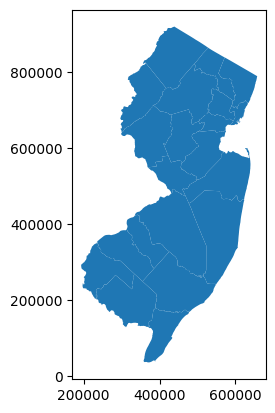

In [ ]:
njC0.plot()

<Axes: >

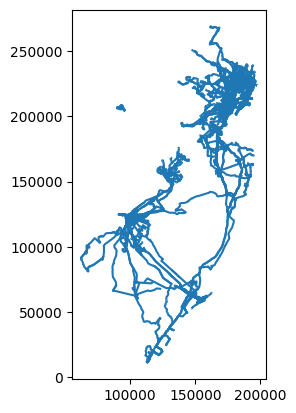

In [ ]:
njT0.plot()

<Axes: >

<Axes: >

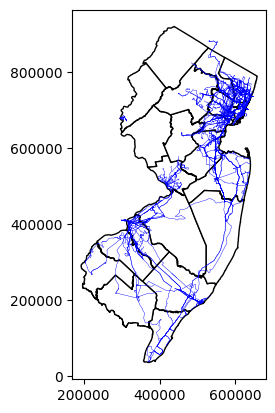

In [7]:
#To add the New Jersey county lines, I'm trying to overlay the data from the class example (nj_counties) with the data of nj_transit lines I found
#My first attmept showed the transit lines much smaller than the county shapes, so I asked chatGPT how to make the two maps I am overlaying the same size. I adapted line 1 and 2 from the Chat GPT suggestion
if njC0.crs != njT0.crs:
    njT0 = njT0.to_crs(njC0.crs)
#I used a version of the code you show later on to overlay two maps
fig, ax = plt.subplots()
njC0.plot(ax=ax, color='white', edgecolor='black',linewidth=1)
njT0.plot(ax=ax, color='blue', linewidth=0.3)

NJ Census Data on Population

In [88]:
njpopXls=pd.read_excel('https://docs.google.com/uc?id=1I4fP30YDTnZs9WW-O9wKsa-DDKsATd_S&export=download')

In [89]:
njpopXls.dtypes

,0
Unnamed: 0,object
"Atlantic County, New Jersey",object
Unnamed: 2,object
"Bergen County, New Jersey",object
Unnamed: 4,object
"Burlington County, New Jersey",object
Unnamed: 6,object
"Camden County, New Jersey",object
Unnamed: 8,object
"Cape May County, New Jersey",object


In [90]:
#renaming the first column to county
njpopXls.rename(columns={'Unnamed: 0': 'county'}, inplace=True)

In [91]:
#dropping all other columns that are unnamed (these are margins of error)

mofe = njpopXls.columns[njpopXls.columns.str.startswith('Unnamed')]
njpop1=njpopXls.drop(mofe, axis='columns')

In [92]:
njpop1.dtypes

,0
county,object
"Atlantic County, New Jersey",object
"Bergen County, New Jersey",object
"Burlington County, New Jersey",object
"Camden County, New Jersey",object
"Cape May County, New Jersey",object
"Cumberland County, New Jersey",object
"Essex County, New Jersey",object
"Gloucester County, New Jersey",object
"Hudson County, New Jersey",object


In [93]:
#flipping the columns and rows
njpop_transposed = njpop1.T

In [94]:
njpop_transposed.head(2)

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
county,NaN,Label,Population 1 year and over,AGE,1 to 4 years,5 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,...,Population 1 year and over for whom poverty st...,Below 100 percent of the poverty level,100 to 149 percent of the poverty level,At or above 150 percent of the poverty level,HOUSING TENURE,Population 1 year and over in housing units,Householder lived in owner-occupied housing units,Householder lived in renter-occupied housing u...,PERCENT ALLOCATED,Residence 1 year ago
"Atlantic County, New Jersey",Total,Estimate,"272,315",NaN,"11,035","42,648","25,087","31,772","31,347","33,455",...,"266,441","31,082","19,405","215,954",NaN,"265,733","178,596","87,137",NaN,11.5%


In [95]:
#making the first row the names of my columns
njpop_transposed.columns = njpop_transposed.iloc[0]

In [96]:
njpop_transposed.head(2)

county,NaN,Label,Population 1 year and over,AGE,1 to 4 years,5 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,...,Population 1 year and over for whom poverty status is determined,Below 100 percent of the poverty level,100 to 149 percent of the poverty level,At or above 150 percent of the poverty level,HOUSING TENURE,Population 1 year and over in housing units,Householder lived in owner-occupied housing units,Householder lived in renter-occupied housing units,PERCENT ALLOCATED,Residence 1 year ago
county,NaN,Label,Population 1 year and over,AGE,1 to 4 years,5 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,...,Population 1 year and over for whom poverty st...,Below 100 percent of the poverty level,100 to 149 percent of the poverty level,At or above 150 percent of the poverty level,HOUSING TENURE,Population 1 year and over in housing units,Householder lived in owner-occupied housing units,Householder lived in renter-occupied housing u...,PERCENT ALLOCATED,Residence 1 year ago
"Atlantic County, New Jersey",Total,Estimate,"272,315",NaN,"11,035","42,648","25,087","31,772","31,347","33,455",...,"266,441","31,082","19,405","215,954",NaN,"265,733","178,596","87,137",NaN,11.5%


In [97]:
njpopfb=njpop_transposed[['Population 1 year and over', 'Foreign born']]

In [98]:
njpopfb.head(2)

county,Population 1 year and over,Foreign born
county,Population 1 year and over,Foreign born
"Atlantic County, New Jersey","272,315","46,351"


In [99]:
#dropping the first row
njpopfb.drop('county', axis='index', inplace=True)

<ipython-input-99-7bdfc2f30684>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  njpopfb.drop('county', axis='index', inplace=True)


In [102]:
njpopfb

county,Population 1 year and over,Foreign born
"Atlantic County, New Jersey",272315,46351
"Bergen County, New Jersey",947775,302548
"Burlington County, New Jersey",464221,51678
"Camden County, New Jersey",521285,69554
"Cape May County, New Jersey",N,N
"Cumberland County, New Jersey",N,N
"Essex County, New Jersey",842542,259926
"Gloucester County, New Jersey",305149,19200
"Hudson County, New Jersey",696272,287018
"Hunterdon County, New Jersey",128254,15048


In [101]:
#removing the commas to make conversion to float possible
njpopfb['Population 1 year and over'] =njpopfb['Population 1 year and over'].str.replace(',', '')
njpopfb['Foreign born'] =njpopfb['Foreign born'].str.replace(',', '')

<ipython-input-101-e84758454b8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  njpopfb['Population 1 year and over'] =njpopfb['Population 1 year and over'].str.replace(',', '')
<ipython-input-101-e84758454b8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  njpopfb['Foreign born'] =njpopfb['Foreign born'].str.replace(',', '')


In [103]:
#to convert the values to floats if not all of them are numbers I found this command here: https://www.geeksforgeeks.org/how-to-handle-pandas-value-error-could-not-convert-string-to-float/
njpopfb['Foreign Born Population'] = pd.to_numeric(njpopfb['Foreign born'], errors='coerce')
njpopfb['Total Population'] = pd.to_numeric(njpopfb['Population 1 year and over'], errors='coerce')

<ipython-input-103-aaac3a85f145>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  njpopfb['Foreign Born Population'] = pd.to_numeric(njpopfb['Foreign born'], errors='coerce')
<ipython-input-103-aaac3a85f145>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  njpopfb['Total Population'] = pd.to_numeric(njpopfb['Population 1 year and over'], errors='coerce')


In [104]:
njpopfb.dtypes

,0
county,
Population 1 year and over,object
Foreign born,object
Foreign Born Population,float64
Total Population,float64


In [107]:
njpopfb

county,Population 1 year and over,Foreign born,Foreign Born Population,Total Population,percentage of foreign born population
"Atlantic County, New Jersey",272315,46351,46351.0,272315.0,17.021097
"Bergen County, New Jersey",947775,302548,302548.0,947775.0,31.921922
"Burlington County, New Jersey",464221,51678,51678.0,464221.0,11.132198
"Camden County, New Jersey",521285,69554,69554.0,521285.0,13.342797
"Cape May County, New Jersey",N,N,NaN,NaN,NaN
"Cumberland County, New Jersey",N,N,NaN,NaN,NaN
"Essex County, New Jersey",842542,259926,259926.0,842542.0,30.850213
"Gloucester County, New Jersey",305149,19200,19200.0,305149.0,6.292008
"Hudson County, New Jersey",696272,287018,287018.0,696272.0,41.222109
"Hunterdon County, New Jersey",128254,15048,15048.0,128254.0,11.732967


In [115]:
#adding a column containing the percentage of foreign born population per county
njpopfb['percentage of foreign born population'] = (njpopfb['Foreign Born Population'] / njpopfb['Total Population']) * 100

<ipython-input-115-fc14f94abdd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  njpopfb['percentage of foreign born population'] = (njpopfb['Foreign Born Population'] / njpopfb['Total Population']) * 100


In [116]:
nj_percentage_fb=njpopfb[['percentage of foreign born population']]

In [119]:
nj_percentage_fb

county,percentage of foreign born population
"Atlantic County, New Jersey",17.021097
"Bergen County, New Jersey",31.921922
"Burlington County, New Jersey",11.132198
"Camden County, New Jersey",13.342797
"Cape May County, New Jersey",NaN
"Cumberland County, New Jersey",NaN
"Essex County, New Jersey",30.850213
"Gloucester County, New Jersey",6.292008
"Hudson County, New Jersey",41.222109
"Hunterdon County, New Jersey",11.732967


In [118]:
#resetting the index and making a new column with county names
#code for this from Chat GPT
nj_percentage_fb1 = nj_percentage_fb.reset_index()
nj_percentage_fb1 = nj_percentage_fb1.rename(columns={'index': 'county'})

In [122]:
nj_percentage_fb1

county,county,percentage of foreign born population,COUNTY
0,"Atlantic County, New Jersey",17.021097,ATLANTIC
1,"Bergen County, New Jersey",31.921922,BERGEN
2,"Burlington County, New Jersey",11.132198,BURLINGTON
3,"Camden County, New Jersey",13.342797,CAMDEN
4,"Cape May County, New Jersey",NaN,CAPE MAY
5,"Cumberland County, New Jersey",NaN,CUMBERLAND
6,"Essex County, New Jersey",30.850213,ESSEX
7,"Gloucester County, New Jersey",6.292008,GLOUCESTER
8,"Hudson County, New Jersey",41.222109,HUDSON
9,"Hunterdon County, New Jersey",11.732967,HUNTERDON


In [121]:
#dopping the 'County, New Jersey Part of the Names and making them upper case
nj_percentage_fb1['COUNTY']=nj_percentage_fb1['county'].str.replace(' County, New Jersey', '').str.upper()

In [123]:
njCfb = pd.merge(njC0, nj_percentage_fb1, on='COUNTY',how='outer',indicator=True)
njCfb[['COUNTY','percentage of foreign born population','_merge']]

njCfb2 = pd.merge(njC0, nj_percentage_fb1, on='COUNTY',how='inner',indicator=False)

,COUNTY,percentage of foreign born population,_merge
0,ATLANTIC,17.021097,both
1,BERGEN,31.921922,both
2,BURLINGTON,11.132198,both
3,CAMDEN,13.342797,both
4,CAPE MAY,NaN,both
5,CUMBERLAND,NaN,both
6,ESSEX,30.850213,both
7,GLOUCESTER,6.292008,both
8,HUDSON,41.222109,both
9,HUNTERDON,11.732967,both


<Axes: >

[]

[]

Text(0.5, 80.7222222222222, 'source/definition: https://data.census.gov/table?q=migration%20new%20jersey%20counties&t=Income%20and%20Earnings:Income%20and%20Poverty&g=040XX00US34')

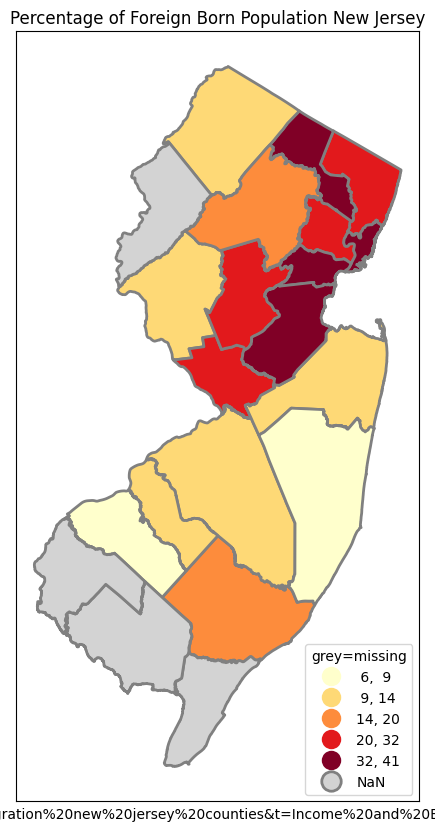

In [131]:
#making the map
fig, ax = plt.subplots(1, figsize=(6,10))
njCfb2.plot(ax=ax,column='percentage of foreign born population',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
leg1 = ax.get_legend()
leg1.set_title('''grey=missing''')
ax.title.set_text("Percentage of Foreign Born Population New Jersey")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: https://data.census.gov/table?q=migration%20new%20jersey%20counties&t=Income%20and%20Earnings:Income%20and%20Poverty&g=040XX00US34''')

<Axes: >

<Axes: >

[]

[]

Text(0.5, 80.7222222222222, 'source/definition: https://data.census.gov/table?q=migration%20new%20jersey%20counties&t=Income%20and%20Earnings:Income%20and%20Poverty&g=040XX00US34')

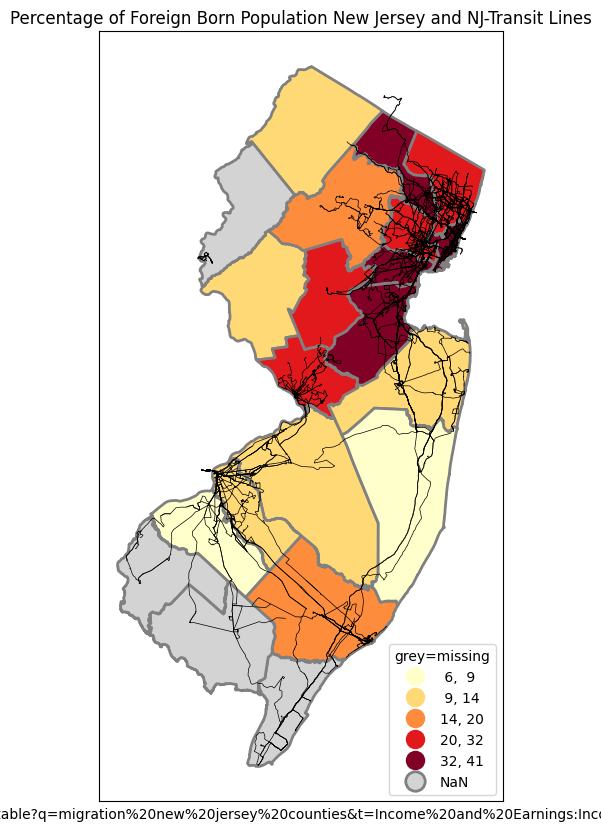

In [135]:
#making the map and combining it with the nj_transit lines map
if njCfb2.crs != njT0.crs:
    njT0 = njT0.to_crs(njCfb2.crs)

fig, ax = plt.subplots(1, figsize=(6,10))
njT0.plot(ax=ax, color='black', linewidth=0.5)
njCfb2.plot(ax=ax,column='percentage of foreign born population',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
leg1 = ax.get_legend()
leg1.set_title('''grey=missing''')
ax.title.set_text("Percentage of Foreign Born Population New Jersey and NJ-Transit Lines")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: https://data.census.gov/table?q=migration%20new%20jersey%20counties&t=Income%20and%20Earnings:Income%20and%20Poverty&g=040XX00US34''')

Ask how I can convert into float and calculate a percentage without having to drop the empty counties